In [6]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from googlefinance.client import get_price_data
%matplotlib inline

<h3> Read Data</h3><br>
The data to be retrieved is defined as a dictionary. We are keen to retrieve the data for Ford (F) and GE (F)

In [7]:
param_GE = {'q': "GE",'x': "NYSE","p" : "1Y",'i': "86400"}
param_F = {'q': "F",'x': "NYSE","p" : "1Y",'i': "86400"}

Read the data into a DataFrame

In [8]:
df_F = get_price_data(param_F)
df_GE = get_price_data(param_GE)

<h3>Inspect the Data</h3>

In [19]:
df_GE.head()

,Open,High,Low,Close,Volume,Range,AbsRange
2017-07-31 22:00:00,0.00,25.69,0.0000,25.61,30616287,-25.61,25.61
2017-10-20 22:00:00,22.14,23.84,22.1000,23.83,192404370,-1.69,1.69
2017-11-13 22:00:00,20.26,20.75,18.7501,19.02,261557413,1.24,1.24
2017-10-23 22:00:00,23.44,23.44,22.1800,22.32,187340912,1.12,1.12
2017-11-14 22:00:00,18.79,18.88,17.4600,17.90,312556809,0.89,0.89


Always inspect the data

In [20]:
df_F.head()

,Open,High,Low,Close,Volume
2017-05-19 22:00:00,10.81,10.940,10.79,10.87,32431694
2017-05-22 22:00:00,11.11,11.130,10.98,11.10,73334997
2017-05-23 22:00:00,11.16,11.165,10.97,11.05,40816647
2017-05-24 22:00:00,11.06,11.060,10.87,10.96,46732734
2017-05-25 22:00:00,10.96,10.970,10.76,10.86,46269245


In [11]:
df_GE.tail()

,Open,High,Low,Close,Volume
2018-05-14 22:00:00,14.70,14.80,14.640,14.71,41033047
2018-05-15 22:00:00,14.70,14.72,14.565,14.71,35258722
2018-05-16 22:00:00,14.71,15.10,14.690,15.03,54623446
2018-05-17 22:00:00,15.12,15.24,14.920,15.03,50728581
2018-05-18 22:00:00,15.08,15.10,14.920,14.97,34363828


<h3>Add a customn column to the DataFrame </h3><br>
Containing difference between open en closing price

In [12]:
df_GE['Range']=df_GE['Open']-df_GE['Close']
df_GE.head()

,Open,High,Low,Close,Volume,Range
2017-05-19 22:00:00,27.55,28.165,27.50,28.05,48488671,-0.50
2017-05-22 22:00:00,28.23,28.300,28.06,28.18,27810667,0.05
2017-05-23 22:00:00,28.21,28.280,28.11,28.28,23877122,-0.07
2017-05-24 22:00:00,28.32,28.500,27.62,27.83,53867078,0.49
2017-05-25 22:00:00,27.79,27.900,27.42,27.49,39254436,0.30


Calculate absolute value of the difference

In [13]:
df_GE['AbsRange'] = df_GE['Range'].apply(lambda x: np.abs(x))
df_GE.head()

,Open,High,Low,Close,Volume,Range,AbsRange
2017-05-19 22:00:00,27.55,28.165,27.50,28.05,48488671,-0.50,0.50
2017-05-22 22:00:00,28.23,28.300,28.06,28.18,27810667,0.05,0.05
2017-05-23 22:00:00,28.21,28.280,28.11,28.28,23877122,-0.07,0.07
2017-05-24 22:00:00,28.32,28.500,27.62,27.83,53867078,0.49,0.49
2017-05-25 22:00:00,27.79,27.900,27.42,27.49,39254436,0.30,0.30


<h3>Sorting the results</h3><br>
Make sure you set "inplace=True"

In [14]:
df_GE.sort_values(by='AbsRange',inplace=True,ascending=False)
df_GE.head()

,Open,High,Low,Close,Volume,Range,AbsRange
2017-07-31 22:00:00,0.00,25.69,0.0000,25.61,30616287,-25.61,25.61
2017-10-20 22:00:00,22.14,23.84,22.1000,23.83,192404370,-1.69,1.69
2017-11-13 22:00:00,20.26,20.75,18.7501,19.02,261557413,1.24,1.24
2017-10-23 22:00:00,23.44,23.44,22.1800,22.32,187340912,1.12,1.12
2017-11-14 22:00:00,18.79,18.88,17.4600,17.90,312556809,0.89,0.89


<h3> Boolean Indexing </h3>
Find the dates where the difference is > 60 Cents

In [15]:
idx = df_GE['AbsRange']>0.6
df_GE.loc[idx,:]

,Open,High,Low,Close,Volume,Range,AbsRange
2017-07-31 22:00:00,0.00,25.690,0.0000,25.61,30616287,-25.61,25.61
2017-10-20 22:00:00,22.14,23.840,22.1000,23.83,192404370,-1.69,1.69
2017-11-13 22:00:00,20.26,20.750,18.7501,19.02,261557413,1.24,1.24
2017-10-23 22:00:00,23.44,23.440,22.1800,22.32,187340912,1.12,1.12
2017-11-14 22:00:00,18.79,18.880,17.4600,17.90,312556809,0.89,0.89
2017-11-15 22:00:00,17.51,18.380,17.5000,18.26,144368004,-0.75,0.75
2018-02-08 22:00:00,15.19,15.205,14.4500,14.45,138636134,0.74,0.74
2017-10-09 22:00:00,24.10,24.150,23.2500,23.43,140302771,0.67,0.67
2017-06-13 22:00:00,29.12,29.160,28.3400,28.45,58823660,0.67,0.67
2018-04-25 22:00:00,14.72,14.730,13.9100,14.05,111261793,0.67,0.67


<h3>Comparing with Ford<h3>

In [16]:
df = pd.concat([df_GE['Close'],df_F['Close']],axis=1)
df.columns = ['GE','F']
df.head()

,GE,F
2017-05-19 22:00:00,28.05,10.87
2017-05-22 22:00:00,28.18,11.10
2017-05-23 22:00:00,28.28,11.05
2017-05-24 22:00:00,27.83,10.96
2017-05-25 22:00:00,27.49,10.86


Calculate the difference between the return of GE and F

In [17]:
df_ret = df.pct_change(periods=1)
df_ret['Diff']= df_ret['GE']-df_ret['F']
df_ret['Diff']=df_ret['Diff'].apply(lambda x : np.abs(x))
df_ret.head()

,GE,F,Diff
2017-05-19 22:00:00,NaN,NaN,NaN
2017-05-22 22:00:00,0.004635,0.021159,0.016525
2017-05-23 22:00:00,0.003549,-0.004505,0.008053
2017-05-24 22:00:00,-0.015912,-0.008145,0.007768
2017-05-25 22:00:00,-0.012217,-0.009124,0.003093


<h3>Graph</h3>
DataFrames have their own build-in functions

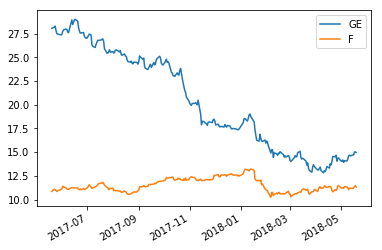

In [21]:
df.plot();